In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
url = "Downloads/EVData.csv"
df = pd.read_csv(url)

In [3]:
df.head(10)

,Clean Alternative Fuel Vehicle Type,VIN (1-10),DOL Vehicle ID,Model Year,Make,Model,Vehicle Primary Use,Electric Range,Odometer Reading,Odometer Code,...,Meets 2019 HB 2042 Sale Price/Value Requirement,2019 HB 2042: Battery Range Requirement,2019 HB 2042: Purchase Date Requirement,2019 HB 2042: Sale Price/Value Requirement,Electric Vehicle Fee Paid,Transportation Electrification Fee Paid,Hybrid Vehicle Electrification Fee Paid,2020 Census Tract,Legislative District,Electric Utility
0,Battery Electric Vehicle (BEV),5YJSA1CN4D,281040350,2013,TESLA,Model S,Passenger,208,15500,Actual Mileage,...,False,NaN,"Non-sale, registration transaction","Non-sale, registration transaction",Yes,NaN,NaN,5.303301e+10,37.0,CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)
1,Battery Electric Vehicle (BEV),5YJSA1H17E,190417853,2014,TESLA,Model S,Passenger,208,16331,Actual Mileage,...,False,NaN,Sale price not available,Sale price not available,Not Applicable,NaN,NaN,5.303301e+10,37.0,CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)
2,Battery Electric Vehicle (BEV),5YJSA1DP6D,137019942,2013,TESLA,Model S,Passenger,208,26629,Actual Mileage,...,False,NaN,"Non-sale, registration transaction","Non-sale, registration transaction",Yes,NaN,NaN,5.303301e+10,37.0,CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)
3,Battery Electric Vehicle (BEV),5YJSA1DP1D,239433008,2013,TESLA,Model S,Passenger,208,0,Odometer reading is not collected at time of r...,...,False,NaN,"Non-sale, registration transaction","Non-sale, registration transaction",Yes,Yes,No,5.303301e+10,37.0,CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)
4,Battery Electric Vehicle (BEV),5YJSA1H14E,149926332,2014,TESLA,Model S,Passenger,208,20032,Actual Mileage,...,False,NaN,Sale price not available,Sale price not available,Not Applicable,NaN,NaN,5.303301e+10,37.0,CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)
5,Battery Electric Vehicle (BEV),JN1AZ0CP6B,101926373,2011,NISSAN,Leaf,Passenger,73,5,Actual Mileage,...,False,NaN,Sale price not available,Sale price not available,Not Applicable,NaN,NaN,5.303301e+10,37.0,CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)
6,Battery Electric Vehicle (BEV),JN1AZ0CP6B,101926373,2011,NISSAN,Leaf,Passenger,73,5,Actual Mileage,...,False,NaN,"Non-sale, registration transaction","Non-sale, registration transaction",No,NaN,NaN,5.303301e+10,37.0,CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)
7,Battery Electric Vehicle (BEV),5YJSA1H18E,166510998,2014,TESLA,Model S,Passenger,208,4673,Actual Mileage,...,False,NaN,Sale price not available,Sale price not available,Not Applicable,NaN,NaN,5.303301e+10,37.0,CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)
8,Battery Electric Vehicle (BEV),5YJSA1DP1D,239433008,2013,TESLA,Model S,Passenger,208,0,Odometer reading is not collected at time of r...,...,False,NaN,"Non-sale, registration transaction","Non-sale, registration transaction",Yes,No,No,5.303301e+10,37.0,CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)
9,Battery Electric Vehicle (BEV),5YJSA1H13E,265063424,2014,TESLA,Model S,Passenger,208,30510,Actual Mileage,...,False,NaN,Sale price not available,Sale price not available,Not Applicable,NaN,NaN,5.303301e+10,37.0,CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)


In [4]:
#check data type for potential info and type mismatch , compatibility with data functions
df.dtypes

Clean Alternative Fuel Vehicle Type                                object
VIN (1-10)                                                         object
DOL Vehicle ID                                                      int64
Model Year                                                          int64
Make                                                               object
Model                                                              object
Vehicle Primary Use                                                object
Electric Range                                                      int64
Odometer Reading                                                    int64
Odometer Code                                                      object
New or Used Vehicle                                                object
Sale Price                                                          int64
Sale Date                                                          object
Base MSRP                             

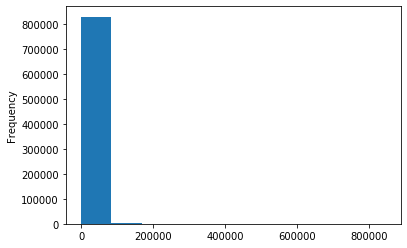

In [5]:
df['Base MSRP'].plot(kind='hist')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 832178 entries, 0 to 832177
Data columns (total 35 columns):
Clean Alternative Fuel Vehicle Type                               832178 non-null object
VIN (1-10)                                                        832178 non-null object
DOL Vehicle ID                                                    832178 non-null int64
Model Year                                                        832178 non-null int64
Make                                                              832178 non-null object
Model                                                             832178 non-null object
Vehicle Primary Use                                               832178 non-null object
Electric Range                                                    832178 non-null int64
Odometer Reading                                                  832178 non-null int64
Odometer Code                                                     832178 non-null object
New

In [7]:
df['DOL Transaction Date']

0          November 29 2016
1            August 27 2015
2               May 25 2016
3              July 29 2020
4            August 05 2016
                ...        
832173    September 21 2023
832174    September 20 2023
832175    September 13 2023
832176        April 25 2018
832177    September 23 2014
Name: DOL Transaction Date, Length: 832178, dtype: object

In [8]:
df['DOL Transaction Date'] = pd.to_datetime(df['DOL Transaction Date'])

In [9]:
df['DOL Transaction Date'].describe(include="all")

count                  832178
unique                   3894
top       2022-10-04 00:00:00
freq                     1936
first     2010-01-06 00:00:00
last      2023-09-30 00:00:00
Name: DOL Transaction Date, dtype: object

In [10]:
df["datetime_monday_week"] = df['DOL Transaction Date'].dt.to_period('W').dt.start_time

In [11]:
df["datetime_monday_week"].describe(include="all")

count                  832178
unique                    705
top       2023-08-07 00:00:00
freq                     6701
first     2010-01-04 00:00:00
last      2023-09-25 00:00:00
Name: datetime_monday_week, dtype: object

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 832178 entries, 0 to 832177
Data columns (total 36 columns):
Clean Alternative Fuel Vehicle Type                               832178 non-null object
VIN (1-10)                                                        832178 non-null object
DOL Vehicle ID                                                    832178 non-null int64
Model Year                                                        832178 non-null int64
Make                                                              832178 non-null object
Model                                                             832178 non-null object
Vehicle Primary Use                                               832178 non-null object
Electric Range                                                    832178 non-null int64
Odometer Reading                                                  832178 non-null int64
Odometer Code                                                     832178 non-null object
New

In [13]:
df["Base MSRP"].describe()

count    832178.000000
mean       2825.458430
std       13624.032986
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      845000.000000
Name: Base MSRP, dtype: float64

In [14]:
df["Model"].describe(include="all")

count     832178
unique       133
top         Leaf
freq      148044
Name: Model, dtype: object

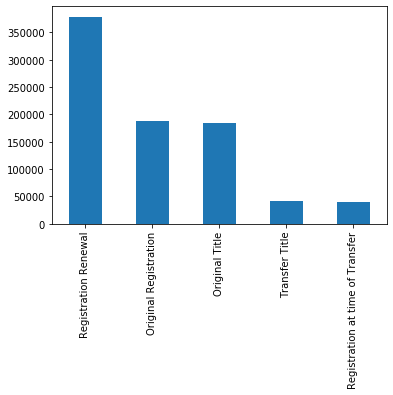

In [15]:
df['Transaction Type'].value_counts().plot(kind='bar')

In [16]:
transaction_list = ['Original Title','Transfer Title']
filtered_df = df[df['Transaction Type'].isin(transaction_list)]

In [17]:
filtered_df.describe(include="all")

,Clean Alternative Fuel Vehicle Type,VIN (1-10),DOL Vehicle ID,Model Year,Make,Model,Vehicle Primary Use,Electric Range,Odometer Reading,Odometer Code,...,2019 HB 2042: Battery Range Requirement,2019 HB 2042: Purchase Date Requirement,2019 HB 2042: Sale Price/Value Requirement,Electric Vehicle Fee Paid,Transportation Electrification Fee Paid,Hybrid Vehicle Electrification Fee Paid,2020 Census Tract,Legislative District,Electric Utility,datetime_monday_week
count,226604,226604,2.266040e+05,226604.000000,226604,226604,226604,226604.000000,226604.000000,226604,...,109735,226604,226604,226604,197831,197831,2.266000e+05,226122.000000,226600,226604
unique,3,10021,NaN,NaN,40,133,12,NaN,NaN,6,...,2,7,6,1,1,1,NaN,NaN,78,683
top,Battery Electric Vehicle (BEV),7SAYGDEE6P,NaN,NaN,TESLA,Model 3,Passenger,NaN,NaN,Actual Mileage,...,No battery range,Meets purchase date requirement,Sale price too high,Not Applicable,Not Applicable,Not Applicable,NaN,NaN,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),2023-08-07 00:00:00
freq,171780,880,NaN,NaN,89044,35891,221054,NaN,NaN,225850,...,80602,145807,114187,226604,197831,197831,NaN,NaN,84678,2302
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010-02-15 00:00:00
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-09-25 00:00:00
mean,NaN,NaN,2.078510e+08,2018.942931,NaN,NaN,NaN,76.582938,9848.264360,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,5.298581e+10,29.773109,NaN,NaN
std,NaN,NaN,8.817804e+07,3.475206,NaN,NaN,NaN,93.490058,20678.309205,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.401339e+09,14.778641,NaN,NaN
min,NaN,NaN,4.000000e+00,1993.000000,NaN,NaN,NaN,0.000000,0.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.097007e+09,1.000000,NaN,NaN
25%,NaN,NaN,1.544581e+08,2016.000000,NaN,NaN,NaN,0.000000,15.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,5.303301e+10,18.000000,NaN,NaN


In [18]:
df.describe(include="all")

,Clean Alternative Fuel Vehicle Type,VIN (1-10),DOL Vehicle ID,Model Year,Make,Model,Vehicle Primary Use,Electric Range,Odometer Reading,Odometer Code,...,2019 HB 2042: Battery Range Requirement,2019 HB 2042: Purchase Date Requirement,2019 HB 2042: Sale Price/Value Requirement,Electric Vehicle Fee Paid,Transportation Electrification Fee Paid,Hybrid Vehicle Electrification Fee Paid,2020 Census Tract,Legislative District,Electric Utility,datetime_monday_week
count,832178,832178,8.321780e+05,832178.000000,832178,832178,832178,832178.000000,832178.000000,832178,...,323028,832178,832178,832178,741147,741147,8.321420e+05,829268.000000,832142,832178
unique,3,10088,NaN,NaN,40,133,13,NaN,NaN,7,...,2,8,7,3,3,3,NaN,NaN,78,705
top,Battery Electric Vehicle (BEV),1N4AZ0CP6D,NaN,NaN,TESLA,Leaf,Passenger,NaN,NaN,Odometer reading is not collected at time of r...,...,No battery range,"Non-sale, registration transaction","Non-sale, registration transaction",Yes,No,No,NaN,NaN,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),2023-08-07 00:00:00
freq,613625,3194,NaN,NaN,320798,148044,819478,NaN,NaN,543316,...,206317,605574,605574,338443,286860,498599,NaN,NaN,308712,6701
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010-01-04 00:00:00
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-09-25 00:00:00
mean,NaN,NaN,2.064050e+08,2018.002653,NaN,NaN,NaN,92.008356,2889.363194,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,5.294168e+10,29.978776,NaN,NaN
std,NaN,NaN,9.727245e+07,3.443589,NaN,NaN,NaN,95.545239,11876.809017,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.948838e+09,14.757128,NaN,NaN
min,NaN,NaN,4.000000e+00,1993.000000,NaN,NaN,NaN,0.000000,0.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.045020e+09,1.000000,NaN,NaN
25%,NaN,NaN,1.466472e+08,2015.000000,NaN,NaN,NaN,6.000000,0.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,5.303301e+10,19.000000,NaN,NaN


In [19]:
filtered_df.groupby(by=["datetime_monday_week"]).count().sort_values(['datetime_monday_week'], ascending=True)
                                                    

,Clean Alternative Fuel Vehicle Type,VIN (1-10),DOL Vehicle ID,Model Year,Make,Model,Vehicle Primary Use,Electric Range,Odometer Reading,Odometer Code,...,Meets 2019 HB 2042 Sale Price/Value Requirement,2019 HB 2042: Battery Range Requirement,2019 HB 2042: Purchase Date Requirement,2019 HB 2042: Sale Price/Value Requirement,Electric Vehicle Fee Paid,Transportation Electrification Fee Paid,Hybrid Vehicle Electrification Fee Paid,2020 Census Tract,Legislative District,Electric Utility
datetime_monday_week,,,,,,,,,,,,,,,,,,,,,
2010-02-15,1,1,1,1,1,1,1,1,1,1,...,1,0,1,1,1,0,0,1,1,1
2010-03-15,1,1,1,1,1,1,1,1,1,1,...,1,0,1,1,1,0,0,1,1,1
2010-03-29,1,1,1,1,1,1,1,1,1,1,...,1,0,1,1,1,0,0,1,1,1
2010-04-05,1,1,1,1,1,1,1,1,1,1,...,1,0,1,1,1,0,0,1,1,1
2010-04-12,1,1,1,1,1,1,1,1,1,1,...,1,0,1,1,1,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-28,1624,1624,1624,1624,1624,1624,1624,1624,1624,1624,...,1624,1235,1624,1624,1624,1624,1624,1624,1622,1624
2023-09-04,1216,1216,1216,1216,1216,1216,1216,1216,1216,1216,...,1216,887,1216,1216,1216,1216,1216,1216,1215,1216
2023-09-11,1572,1572,1572,1572,1572,1572,1572,1572,1572,1572,...,1572,1140,1572,1572,1572,1572,1572,1572,1569,1572


In [20]:
temp=filtered_df.groupby(by=['datetime_monday_week']).count().sort_values("datetime_monday_week")

In [21]:
new_dates = pd.date_range(start='2010-01-04',end='2023-10-01',freq='W-MON')

In [22]:
temp = temp.reindex(new_dates, fill_value=0).reset_index()

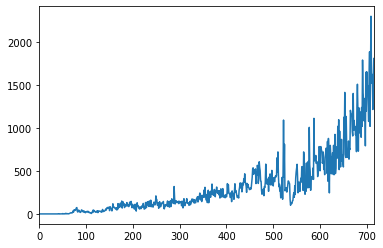

In [23]:
temp['Make'].plot()

In [24]:
temp=temp.rename(columns={"Make": "Count"})

In [25]:
count_df=temp.loc[:, ["index","Count"]]

In [26]:
from pathlib import Path  
filepath = Path('Downloads/out.csv')

In [27]:
count_df.to_csv(filepath) 

In [28]:
count_df

,index,Count
0,2010-01-04,0
1,2010-01-11,0
2,2010-01-18,0
3,2010-01-25,0
4,2010-02-01,0
...,...,...
712,2023-08-28,1624
713,2023-09-04,1216
714,2023-09-11,1572
715,2023-09-18,1812


# Effect of travel range on sales of battery electric vehicles

### main dependent variable of interest is weekly EV sales while the main independent variable of interest was travel range. 

In [29]:
url = "Downloads/range_fluctuation.csv"
range_df = pd.read_csv(url)

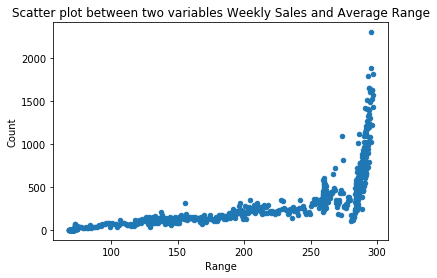

In [30]:
range_df.plot.scatter(x='Range', y='Count', title= "Scatter plot between two variables Weekly Sales and Average Range")

### There is generally a positive relationship between range and weekly sales

In [31]:
#import linear model from scikit learn 
from sklearn.linear_model import LinearRegression
#create a linear regression object using constructor 
lm = LinearRegression()

In [32]:
#define predictor variable and target variable 
predictor = range_df[['Range']]
target = range_df[['Count']]

In [33]:
#then fit model ie define the parameteres b0 and b1
lm.fit(predictor,target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [34]:
#obtain prediction using predict method 
predictions = lm.predict(predictor)
print(predictions)

[[-82.58729364]
 [-82.29619662]
 [-82.00509959]
 [-81.71400257]
 [-81.42290554]
 [-81.13180852]
 [-80.84071146]
 [-80.54961443]
 [-80.25851741]
 [-79.96742038]
 [-79.67632336]
 [-79.38522633]
 [-79.09412931]
 [-78.80303228]
 [-78.51193526]
 [-78.22083823]
 [-77.92974121]
 [-77.63864415]
 [-77.34754713]
 [-77.0564501 ]
 [-76.76535308]
 [-76.47425605]
 [-76.18315903]
 [-76.0045822 ]
 [-75.82600537]
 [-75.64742854]
 [-75.46885171]
 [-75.29027489]
 [-75.11169806]
 [-74.9331212 ]
 [-74.75454437]
 [-74.57596754]
 [-74.39739071]
 [-74.21881388]
 [-74.04023706]
 [-73.86166023]
 [-73.6830834 ]
 [-73.50450657]
 [-73.32592974]
 [-73.14735292]
 [-72.96877609]
 [-72.79019926]
 [-72.6116224 ]
 [-72.43304557]
 [-72.25446874]
 [-72.07589191]
 [-71.89731509]
 [-71.71873826]
 [-71.54016143]
 [-71.3615846 ]
 [-71.18300777]
 [-71.00443095]
 [-70.82585412]
 [-70.64727729]
 [-70.46870046]
 [-70.2901236 ]
 [-70.11154677]
 [-69.93296994]
 [-69.75439312]
 [-69.57581629]
 [-69.39723946]
 [-69.21866263]
 [-69.04

In [35]:
lm.score(predictor,target)

0.5477540424312337

### this is the R^2 score of the model. This is the percentage of the explained variance of the predictions.

In [36]:
lm.coef_

array([[3.20206731]])

In [37]:
lm.intercept_

array([-300.32787057])

# Effects of population number on sales of battery electric vehicles

In [38]:
url = "Downloads/population_fluctuation.csv"
population_df = pd.read_csv(url)

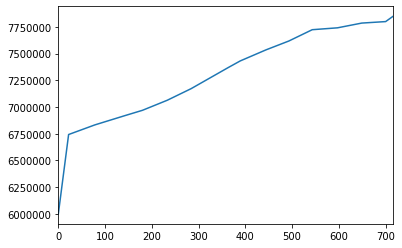

In [39]:
population_df['Population'].plot()

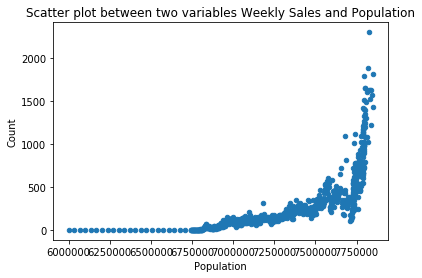

In [40]:
population_df.plot.scatter(x='Population', y='Count', title= "Scatter plot between two variables Weekly Sales and Population")

### There is generally a positive relationship between Weekly Sales and Population

In [41]:
#create a linear regression object using constructor 
lm2 = LinearRegression()

In [42]:
#define predictor variable and target variable 
predictor = population_df[['Population']]
target = population_df[['Count']]

In [43]:
#then fit model ie define the parameteres b0 and b1
lm2.fit(predictor,target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [44]:
#obtain prediction using predict method 
predictions = lm2.predict(predictor)
print(predictions)

[[-5.80004035e+02]
 [-5.56952247e+02]
 [-5.33900458e+02]
 [-5.10848670e+02]
 [-4.87796883e+02]
 [-4.64745094e+02]
 [-4.41693306e+02]
 [-4.18641518e+02]
 [-3.95589730e+02]
 [-3.72537942e+02]
 [-3.49486153e+02]
 [-3.26434365e+02]
 [-3.03382577e+02]
 [-2.80330789e+02]
 [-2.57279001e+02]
 [-2.34227213e+02]
 [-2.11175424e+02]
 [-1.88123636e+02]
 [-1.65071848e+02]
 [-1.42020060e+02]
 [-1.18968272e+02]
 [-9.59164834e+01]
 [-7.28646955e+01]
 [-7.17559487e+01]
 [-7.06472020e+01]
 [-6.95384553e+01]
 [-6.84297085e+01]
 [-6.73209618e+01]
 [-6.62122150e+01]
 [-6.51034676e+01]
 [-6.39947209e+01]
 [-6.28859741e+01]
 [-6.17772274e+01]
 [-6.06684807e+01]
 [-5.95597339e+01]
 [-5.84509872e+01]
 [-5.73422404e+01]
 [-5.62334937e+01]
 [-5.51247470e+01]
 [-5.40160002e+01]
 [-5.29072535e+01]
 [-5.17985067e+01]
 [-5.06897593e+01]
 [-4.95810126e+01]
 [-4.84722658e+01]
 [-4.73635191e+01]
 [-4.62547723e+01]
 [-4.51460256e+01]
 [-4.40372789e+01]
 [-4.29285321e+01]
 [-4.18197854e+01]
 [-4.07110386e+01]
 [-3.9602291

In [45]:
lm2.score(predictor,target)

0.5453604404476735

In [46]:
lm.coef_

array([[3.20206731]])

In [47]:
lm.intercept_

array([-300.32787057])

### Combine for multivariable linear regression model 

In [48]:
df_merged = pd.concat([population_df, range_df], axis=1)

In [49]:
df_merged = df_merged.loc[:,~df_merged.columns.duplicated()]

In [50]:
df_merged['Count']

0         0
1         0
2         0
3         0
4         0
       ... 
712    1624
713    1216
714    1572
715    1812
716    1437
Name: Count, Length: 717, dtype: int64

In [51]:
lm3 = LinearRegression()

In [52]:
predictor = df_merged[['Population','Range']]
target = df_merged[['Count']]

In [53]:
target

,Count
0,0
1,0
2,0
3,0
4,0
...,...
712,1624
713,1216
714,1572
715,1812


In [54]:
lm3.fit(predictor,target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [55]:
#obtain prediction using predict method 
Yhat = lm3.predict(predictor)

In [56]:
Yhat

array([[-3.19517700e+02],
       [-3.08623466e+02],
       [-2.97729232e+02],
       [-2.86834998e+02],
       [-2.75940764e+02],
       [-2.65046529e+02],
       [-2.54152296e+02],
       [-2.43258061e+02],
       [-2.32363827e+02],
       [-2.21469593e+02],
       [-2.10575359e+02],
       [-1.99681125e+02],
       [-1.88786891e+02],
       [-1.77892657e+02],
       [-1.66998423e+02],
       [-1.56104189e+02],
       [-1.45209955e+02],
       [-1.34315721e+02],
       [-1.23421487e+02],
       [-1.12527253e+02],
       [-1.01633019e+02],
       [-9.07387847e+01],
       [-7.98445508e+01],
       [-7.92304388e+01],
       [-7.86163269e+01],
       [-7.80022149e+01],
       [-7.73881030e+01],
       [-7.67739910e+01],
       [-7.61598790e+01],
       [-7.55457668e+01],
       [-7.49316548e+01],
       [-7.43175428e+01],
       [-7.37034309e+01],
       [-7.30893189e+01],
       [-7.24752070e+01],
       [-7.18610950e+01],
       [-7.12469831e+01],
       [-7.06328711e+01],
       [-7.0

In [57]:
lm3.score(predictor,target)

0.5539107062942258

In [58]:
print(lm3.coef_)

[[3.17851196e-04 1.75342497e+00]]


In [59]:
lm3.intercept_

array([-2345.85777212])

In [60]:
url = "Downloads/gas.csv"
gas_df = pd.read_csv(url)

In [61]:
gas_df[344:345]

,Price,Week
344,2.908,2010-01-04/2010-01-10


In [62]:
gas_df.tail(5)

,Price,Week
1057,5.043,2023-09-04/2023-09-10
1058,5.043,2023-09-11/2023-09-17
1059,5.043,2023-09-18/2023-09-24
1060,5.043,2023-09-25/2023-10-01
1061,4.862,2023-10-02/2023-10-08


In [63]:
gas_df=gas_df.iloc[344:1061]

In [64]:
gas_df.reset_index(drop=True, inplace=True)

In [65]:
gas_df

,Price,Week
0,2.908,2010-01-04/2010-01-10
1,2.908,2010-01-11/2010-01-17
2,2.908,2010-01-18/2010-01-24
3,2.908,2010-01-25/2010-01-31
4,2.867,2010-02-01/2010-02-07
...,...,...
712,5.035,2023-08-28/2023-09-03
713,5.043,2023-09-04/2023-09-10
714,5.043,2023-09-11/2023-09-17
715,5.043,2023-09-18/2023-09-24


In [66]:
df_merged = pd.concat([population_df, range_df,gas_df], axis=1)

In [67]:
df_merged = df_merged.loc[:,~df_merged.columns.duplicated()]

In [68]:
df_merged

,Unnamed: 0,index,Count,Population,Range,Price,Week
0,0,2010-01-04,0,6000000.000,68.000000,2.908,2010-01-04/2010-01-10
1,1,2010-01-11,0,6033773.136,68.090909,2.908,2010-01-11/2010-01-17
2,2,2010-01-18,0,6067546.273,68.181818,2.908,2010-01-18/2010-01-24
3,3,2010-01-25,0,6101319.409,68.272727,2.908,2010-01-25/2010-01-31
4,4,2010-02-01,0,6135092.545,68.363636,2.867,2010-02-01/2010-02-07
...,...,...,...,...,...,...,...
712,712,2023-08-28,1624,7837500.000,296.250000,5.035,2023-08-28/2023-09-03
713,713,2023-09-04,1216,7840625.000,296.437500,5.043,2023-09-04/2023-09-10
714,714,2023-09-11,1572,7843750.000,296.625000,5.043,2023-09-11/2023-09-17
715,715,2023-09-18,1812,7846875.000,296.812500,5.043,2023-09-18/2023-09-24


In [69]:
lm4 = LinearRegression()

In [70]:
predictor = df_merged[['Population','Range','Price']]
target = df_merged[['Count']]

In [71]:
target

,Count
0,0
1,0
2,0
3,0
4,0
...,...
712,1624
713,1216
714,1572
715,1812


In [72]:
predictor

,Population,Range,Price
0,6000000.000,68.000000,2.908
1,6033773.136,68.090909,2.908
2,6067546.273,68.181818,2.908
3,6101319.409,68.272727,2.908
4,6135092.545,68.363636,2.867
...,...,...,...
712,7837500.000,296.250000,5.035
713,7840625.000,296.437500,5.043
714,7843750.000,296.625000,5.043
715,7846875.000,296.812500,5.043


In [73]:
lm4.fit(predictor,target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [74]:
#obtain prediction using predict method 
Yhat = lm4.predict(predictor)

In [75]:
lm4.score(predictor,target)

0.7447375132673676

In [76]:
lm4.coef_

array([[-8.89281237e-05,  3.43515796e+00,  2.42372704e+02]])

In [77]:
lm4.intercept_

array([-523.16157479])

In [78]:
yTrue = df_merged['Count']

In [79]:
from sklearn.metrics import mean_squared_error
mean_squared_error(yTrue, Yhat)

33231.7596598179

### linear regression with range and gas as factors 

In [80]:
df_merged

,Unnamed: 0,index,Count,Population,Range,Price,Week
0,0,2010-01-04,0,6000000.000,68.000000,2.908,2010-01-04/2010-01-10
1,1,2010-01-11,0,6033773.136,68.090909,2.908,2010-01-11/2010-01-17
2,2,2010-01-18,0,6067546.273,68.181818,2.908,2010-01-18/2010-01-24
3,3,2010-01-25,0,6101319.409,68.272727,2.908,2010-01-25/2010-01-31
4,4,2010-02-01,0,6135092.545,68.363636,2.867,2010-02-01/2010-02-07
...,...,...,...,...,...,...,...
712,712,2023-08-28,1624,7837500.000,296.250000,5.035,2023-08-28/2023-09-03
713,713,2023-09-04,1216,7840625.000,296.437500,5.043,2023-09-04/2023-09-10
714,714,2023-09-11,1572,7843750.000,296.625000,5.043,2023-09-11/2023-09-17
715,715,2023-09-18,1812,7846875.000,296.812500,5.043,2023-09-18/2023-09-24


In [81]:
lm5 = LinearRegression()

In [82]:
predictor = df_merged[['Range','Price']]
target = df_merged[['Count']]

In [83]:
lm5.fit(predictor,target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [84]:
#obtain prediction using predict method 
Yhat = lm5.predict(predictor)

In [85]:
lm5.score(predictor,target)

0.7442797794918542

In [86]:
lm5.coef_

array([[  3.03174761, 239.71334449]])

In [87]:
lm5.intercept_

array([-1086.73378442])

In [88]:
lm6 = LinearRegression()

In [89]:
df_merged = pd.concat([range_df,gas_df], axis=1)

In [90]:
df_merged

,Unnamed: 0,index,Count,Range,Price,Week
0,0,2010-01-04,0,68.000000,2.908,2010-01-04/2010-01-10
1,1,2010-01-11,0,68.090909,2.908,2010-01-11/2010-01-17
2,2,2010-01-18,0,68.181818,2.908,2010-01-18/2010-01-24
3,3,2010-01-25,0,68.272727,2.908,2010-01-25/2010-01-31
4,4,2010-02-01,0,68.363636,2.867,2010-02-01/2010-02-07
...,...,...,...,...,...,...
712,712,2023-08-28,1624,296.250000,5.035,2023-08-28/2023-09-03
713,713,2023-09-04,1216,296.437500,5.043,2023-09-04/2023-09-10
714,714,2023-09-11,1572,296.625000,5.043,2023-09-11/2023-09-17
715,715,2023-09-18,1812,296.812500,5.043,2023-09-18/2023-09-24


In [91]:
predictor = df_merged[['Price']]
target = df_merged[['Count']]

In [92]:
lm6.fit(predictor,target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [93]:
#obtain prediction using predict method 
Yhat = lm6.predict(predictor)

In [94]:
lm6.score(predictor,target)

0.2570884791436616

In [95]:
lm6.coef_

array([[273.09778693]])

In [96]:
lm6.intercept_

array([-617.2337286])

### Terrible MSE , need to normalize factors to have similar range 